# Natural Language Processing
#### Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. common example of NLPis something like spellcheck orautocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.
## Recurrent Neural Networks
#### In this tutorial we willintroduce a new kind of neural network thatis much more capable of processing sequential data such as text or characters called a recurrent neural network (RNN for short).
#### We will learn how to use a reccurent neural network to do the following:
#### · Sentiment Analysis  情绪分析
#### · Character Generation 字符生成
### RNN's are fairly complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.

# Sequence Data
#### In the previous tutorials we focused on data that we couldrepresent as one static data point where the notion of time or step was irrelevant. Take for example our image data, it was simply a tensor of shape (width, height, channels). That data doesn't change or care about the notion of time.
#### In this tutorial wewill look at sequences of text and learn how we can encode them in ameaningful way. Unlike images, sequence data such as long chains of text, weather patterns videos and reall anything where the notion ofa step or time is relevant needs to be processed and handled in a special way.
#### But what dolI mean by sequences and whyistext data asequence? Well that's agood question. Since textual data contains many words that follow in a very specific and meaningfulorder we need to beable to keep track of each word and when itoccurs in the data. Simply encoding say an entire paragraph of textinto one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. This is why we treat text as a sequence and process one word at a time. We will keep track of where each ofthese words appear and use that information to try to understand the meaning of peices of text.
#### 序列数据
#### 在先前的教程中，我们集中于可以表示为一个静态数据点的数据，其中时间或步距的概念是不相关的。以我们的图像数据为例，它只是形状的张量（宽度，高度，通道）。该数据不会更改，也不会在乎时间概念。
#### 在本教程中，我们将研究文本序列，并学习如何以有意义的方式对其进行编码。与图像不同，需要以特殊方式处理和处理序列数据，例如长文本链，天气模式视频以及与步或时间概念相关的所有内容。
#### 但是序列的含义是什么，文本数据为什么是序列的？好吧，这是一个好问题。由于文本数据包含许多单词，这些单词以非常具体和有意义的顺序排列，因此我们需要能够跟踪每个单词及其在数据中的出现时间。简单地说，将整个文本段落编码到一个数据点中将不会给我们提供非常有意义的数据图，并且很难进行任何处理。这就是为什么我们将文本视为一个序列并一次处理一个单词的原因。我们将跟踪这些单词中每个单词的出现位置，并使用该信息来尝试理解文字的含义。

### Word Embeddings

# Recurrent Neural Networks (RNN's)
#### Now that we've learned a little bit about how we can encode text it's time to dive into recurrent neural networks. Up until this point we have been using something called feed-forward neural networks. This simply means that all of our data is fed forwards (all at once) from left to right through the network. This was fine for the problems we considered before but won't work very well for processing text. After all even we (humans) don't process text all at once. We read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. Well this is exaclty what are current neural network is designed to do. When we say recurrent neural network all we really mean is a network that contains a loop. A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one's word at a time.
#### This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.
#### Let's have a look at what are current layer might look like.
#### 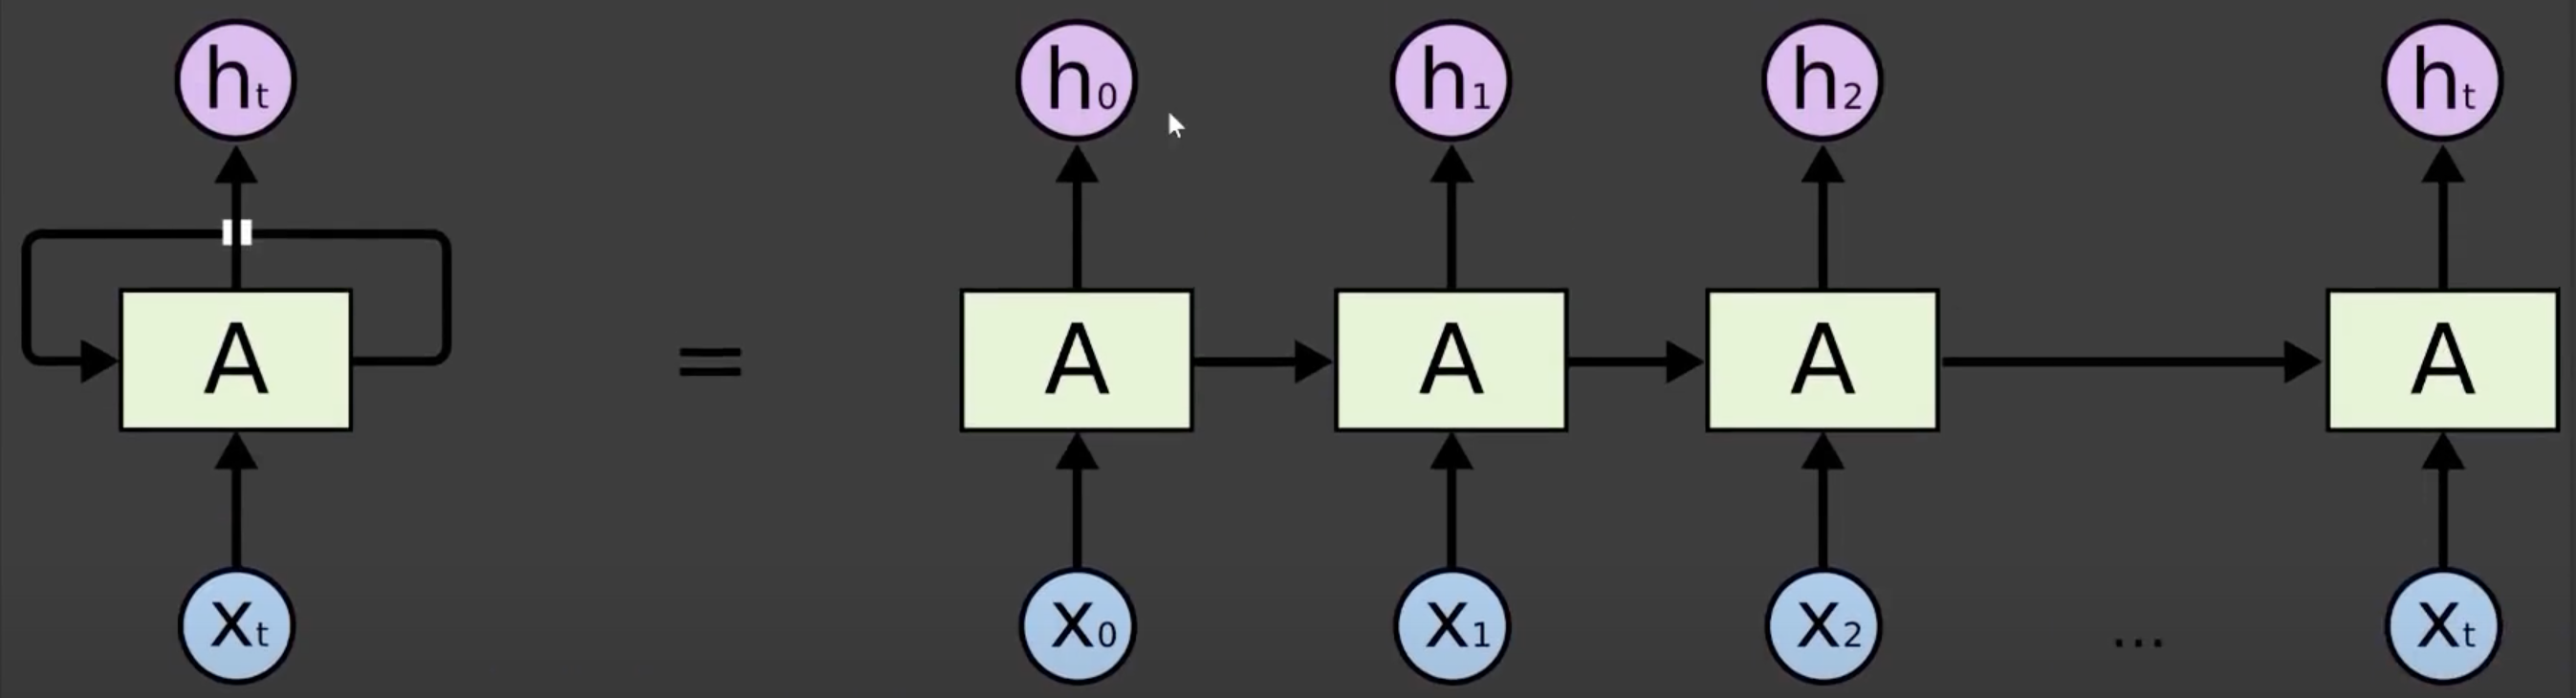
#### Lets define what all these variables stand for before we get into the explination. 
#### · ht output at time t
#### · Xt input at time t
#### · A Recurrent Layer (loop)
#### What this diagram is trying toillustrate is thatarecurrent layer processes words orinput one at a time in a combination with the output from the previous iteration. So as weprogress furtherin the input sequence we build a more complex understanding of the text as a whole
#### What we've just looked at is called a simple RNN layer. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.
#### 该图试图说明的是当前层与上一次迭代的输出结合起来一次处理单词或一次输入一个单词。因此，随着输入序列的进一步发展，我们对整个文本有了更复杂的理解
#### 我们刚刚看过的被称为简单RNN层。对于处理简单的问题，它可以有效地处理较短的文本序列，但与此相关的缺陷很多。其中一个事实是，随着文本序列变长，网络越来越难以正确理解文本。

# LSTM
#### The layer we dicussed in depth above was called a simpleRNN. However, there does exist some other recurrent layers layers that contain a loop) that work much better than a simple RNN layer. The one wewilltalk about here is called LSTM (Long Short-Term Memory) This layer works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. Whereas in our simple RNN layer input from previous timestamps gradully disappeared as we got further through the input. With a LSTM wehave along term memory data structure storing all of the previously seen inputs as well as when we saw them. This allows forus to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more usefulrelationships between inputs and when they appear.
#### For the purpose of this course wewill refrain from going any further into the math ordetails behind how these layers work.

# Sentiment Analysis
#### And now time to see arecurrent neural network in action. For this example we are going to do something called sentiment analysis The formal definition of this term from wikipedia is as follows:
#### the process of computationally identifying and categorizing opinions expressed in apiece oftext,especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.
#### The example well use here is classifying movie reviews as either postive, negative or neutral.
#### This guide is based on the following gtensorflow tutorial:https://www.tensorflow.org/tutorials/text/text_classification_rnn

# Movie Review Dataset
#### Well start by loading in the IMDB movie review dataset from keras. This dataset contains ; 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= VOCAB_SIZE)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/liruizhi/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/liruizhi/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [2]:
# Let's look at one review
train_data[0]
print(type(train_data[0]))
print(len(train_data[0]))
print(type(train_data))
print(train_data.shape)

<class 'list'>
218
<class 'numpy.ndarray'>
(25000,)


# More Preprocessing
#### If we have a look at some of our loaded in reviews well notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore we must make each review the same length. To do this we will follow the procedure below.
   #### · if the review is greater than 250 words then trim off the extra words
   #### · if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.
#### Luckily for us keras has a function that can do this for us:

In [3]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_datat = sequence.pad_sequences(test_data, MAXLEN)

In [4]:
type(train_data)

numpy.ndarray

# Creating the Model

#### Now it's time to create the model We’ll use a word embedding layer as the first layer in our modeland add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment.

#### 32 stands for the output dimension of the vectors generated by the embedding layer. We can change this value if we'd like!

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          2834688   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


# Training
#### Now it's time to compile and train our model

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 31s 47ms/step - loss: 0.5283 - acc: 0.7252 - val_loss: 0.3015 - val_acc: 0.8760
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 0.2342 - acc: 0.9137 - val_loss: 0.2767 - val_acc: 0.8924
Epoch 3/10
625/625 [==============================] - 38s 61ms/step - loss: 0.1899 - acc: 0.9286 - val_loss: 0.3243 - val_acc: 0.8610
Epoch 4/10
625/625 [==============================] - 31s 50ms/step - loss: 0.1480 - acc: 0.9467 - val_loss: 0.2758 - val_acc: 0.8872
Epoch 5/10
625/625 [==============================] - 29s 46ms/step - loss: 0.1212 - acc: 0.9568 - val_loss: 0.3086 - val_acc: 0.8644
Epoch 6/10
625/625 [==============================] - 32s 51ms/step - loss: 0.1095 - acc: 0.9627 - val_loss: 0.2873 - val_acc: 0.8854
Epoch 7/10
625/625 [==============================] - 31s 49ms/step - loss: 0.0957 - acc: 0.9689 - val_loss: 0.3788 - val_acc: 0.8882
Epoch 8/10
625/625 [==============================] - 30s 48ms

#### And we'll evaluate the model on our training data to see how well it performs

In [9]:
results = model.evaluate(test_datat, test_labels)
print(results)

782/782 [==============================] - 8s 10ms/step - loss: 0.5156 - acc: 0.8506
[0.515586256980896, 0.8505600094795227]


#### So were scoring somewhere in the mid-high 80's. Not bad for a simple recurrent network.

# Making Predictions
#### Now let's use our network to make predictions  on our won reviews.
#### Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.

In [10]:
word_index = imdb.get_word_index()

def encode_text(text):
    tokens = keras.preprocessing.text.text_to_word_sequence(text)
    #print(tokens)
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]
    #print('*'* 30)
    #print(tokens)
    return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "Didn't use it long so I can't attest to that but for the price it is extremely good looking and feels like a quality build. Just know it's small - you will not be nuking turkeys in this - and it's not super high wattage so it may take a bit longer. So if you must have your canned soup in 2-1/2 minutes and not 3 then this won't work."
encoded = encode_text(text)
print(encoded)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [11]:
for key, value in word_index.items():
    print(value)


34701
52006
52007
16816
63951
1408
16115
2345
2289
52008
52009
11307
40830
30568
52010
40831
52011
19313
52012
52013
25242
6746
52014
52015
52016
68804
52017
40833
34702
2338
40834
34703
52018
16817
1636
16818
52019
34704
52020
11585
57766
52021
14129
52023
11038
52025
29114
52027
52125
40835
52028
52130
34706
27631
40836
15492
52030
11926
4010
3230
52031
34707
30585
52033
40837
26338
52034
30569
52035
52036
40839
52037
52038
11927
16819
52039
25243
21905
52040
40840
40841
359
5034
7093
21906
23379
52041
52042
18510
30570
9878
40842
52043
52044
52045
40843
34708
25244
7180
52046
40844
11586
20598
52047
11037
52048
52049
52050
17633
52051
30602
40846
52052
52053
23380
52054
27633
52055
10307
52057
42577
15493
40847
52058
22922
52059
27634
5621
40849
52060
52061
16821
40850
52062
40851
19500
34710
52063
5283
30571
25245
52321
34711
40852
178
30572
52065
21908
2103
52066
11928
22433
52067
6702
30573
52068
27635
16116
52069
3930
352
52070
52071
34712
40853
40854
40855
27636
52072
4760
5207

41055
52682
52683
52684
41056
41057
21941
34812
41058
41059
15503
41060
10789
52685
34813
39812
21942
14908
9098
20616
52687
52688
52689
18532
52690
27699
9658
20617
52691
9659
52692
52693
52694
13890
52695
25282
21943
41061
52696
16196
41062
52697
34814
52126
33205
41063
34815
8791
52698
23410
3432
52699
25507
35446
14909
2137
35742
23411
15504
41064
14910
52704
9461
46382
11940
19528
41065
41066
41067
52705
34816
46209
52706
52707
21944
52708
52709
13006
52710
52711
52712
52713
52714
34817
21238
52715
52716
52717
52718
5341
52719
2997
30666
9264
4012
4676
41068
78319
52722
1250
41069
6042
5845
52723
23412
34819
2003
17508
8450
18533
11317
52724
52725
25283
52726
2196
52727
52728
30667
30668
52729
27700
52730
34820
4138
52731
31085
34822
52732
23413
27701
56330
9630
7366
12263
34823
52733
52734
52735
1085
41071
41072
19530
52736
52737
52738
52739
10312
29747
57894
52742
52743
52744
52745
38807
52746
14911
34824
52747
13891
41073
56409
13429
52748
57896
52749
41074
41075
52750
52751
52

53290
30733
41228
13014
41229
53291
1693
53292
1213
53293
53294
53295
12624
30734
53296
13434
53297
53298
4348
53299
21678
53300
53301
49699
34933
14917
41231
41232
64191
41233
53302
16132
30735
53303
41234
30452
41235
53305
53306
30088
53308
9464
311
15638
41236
17668
19745
34934
53310
53311
52224
53312
53313
53314
41237
34936
53315
50129
41238
23446
53317
34937
53318
53319
53320
30736
23447
53321
34938
53322
41677
25321
16852
53323
53324
36075
82573
27749
30737
53326
6987
31514
11320
41239
53327
14374
4814
53329
53330
7697
53331
14919
53332
53333
53334
34940
34941
8423
17669
53338
23448
34942
41240
30738
25322
12270
53339
53340
41241
53341
27750
8428
53342
36776
52228
17670
53345
23449
53346
53347
25323
17510
23450
41242
53348
41243
53350
53351
60184
41244
53353
30739
2178
8064
53354
12625
53355
53356
18548
53357
53358
21974
34944
60211
53359
60404
53360
34945
53361
23451
53362
34739
53364
17671
53365
687
1117
53366
50698
53367
23452
11600
41246
45918
53369
68375
982
50133
53370
5337

54022
54023
54024
41425
54025
41426
41427
41428
4558
23483
35051
54026
25363
54027
64466
41430
54028
41431
41432
41433
27788
7698
18561
41434
54029
19570
30809
35052
25364
35053
21996
16145
16866
41435
54030
54031
10321
35054
35055
35056
25365
54032
8433
30810
54033
22628
35057
21997
41436
35058
3350
26461
19571
35059
35060
35061
14386
54035
54036
54037
34019
3022
24480
54038
25366
21998
13023
2445
41438
8434
54039
36840
30811
35063
54041
54042
16232
54044
27789
41439
54045
16867
9663
2246
30812
64664
21467
30813
9161
1196
3198
9272
54047
41440
35065
21999
54049
54050
25367
54051
54052
54053
54054
13439
35066
27790
669
54055
27791
20672
54057
41441
41442
54058
16868
54059
35067
54060
41443
54061
54062
35068
54063
11951
54064
54065
54066
54067
15521
41444
22000
41445
41446
41447
54068
54069
3659
23484
10564
41448
26513
30814
18562
4559
54070
1314
54071
13910
35070
54072
4314
54073
14387
41449
41450
16869
54074
54075
14934
54076
12276
54077
22630
25368
64879
54079
10102
64900
14935
7699


55116
17648
41779
6268
71796
55118
21295
55120
10109
23539
55121
55122
4898
13931
55123
14404
55124
55125
16903
22040
27871
30948
20716
55126
6359
16904
41780
41781
10482
9671
55127
3868
41783
7484
55128
82702
55129
55130
46909
972
3212
33005
55131
41784
58321
41785
13039
7704
30950
35266
55133
11610
20717
13040
42
55134
46933
55135
41786
55136
9896
35267
41787
41788
30951
30952
41789
55137
9110
22042
23540
41790
80973
7929
55139
55140
30953
41791
5126
55141
41792
55142
15547
19605
11336
14405
41793
55143
55144
35268
19606
24607
55146
55147
55148
55149
41794
39265
30954
2589
12812
27873
41795
55151
30955
72084
52516
55153
55154
22043
41796
22044
50033
9897
55155
17710
55156
41797
55157
29261
14645
19608
5684
10328
55158
25441
35270
23543
35271
55159
5175
55160
35272
14956
17711
55161
15548
46976
38069
10814
10329
55163
41798
55164
55165
35273
20718
27874
6269
55166
55167
55168
7930
55170
20719
55171
55172
35274
37
16172
5752
16173
6996
16907
41799
35275
55173
55174
18589
2281
55175
119

43735
16922
55741
55742
41982
4015
41983
27921
35372
23577
55743
4649
35373
35374
31016
1830
55745
55746
27922
55747
55748
25481
31017
31018
25482
1959
31019
55749
55750
3586
31020
23578
10570
3662
6712
55751
904
16923
35375
6544
55752
55753
35376
55754
55755
27923
55756
55757
55758
41984
55759
55760
55761
4142
3129
1600
55762
55763
55764
25483
41985
55765
55766
55767
41986
7708
31021
55768
55769
55770
55771
35377
55772
9118
17103
75825
55774
35378
55775
41987
3450
15564
81649
55777
22077
55778
29574
55779
506
16187
55781
55782
35380
31022
81659
55784
55785
55786
41989
4717
1489
27924
2736
3037
55787
41990
12649
55788
19623
55789
35381
35382
10571
55790
35834
55791
55792
55793
32486
55794
55795
55796
25484
55797
55798
55799
55800
55801
27925
55802
41991
9279
5799
20069
55804
55805
27926
55806
14417
25485
13945
11969
12650
55807
2906
55808
23579
55809
55810
55811
35383
3233
29587
4993
41992
4960
19147
41993
10115
55813
31024
55814
55815
13461
55816
9674
55817
55818
55819
35385
16188
279

56348
56349
56350
42144
56351
42145
4594
56352
42146
23603
56353
31088
23604
18623
56354
56355
27967
56356
22106
1109
20074
30869
56357
22107
1484
16932
31089
56358
42148
42149
42150
12291
42151
42152
43128
56359
31090
79391
4942
18624
31091
32022
19640
56361
16199
56362
56363
8794
42154
35482
31092
5292
27968
4016
56364
1689
42155
16200
56365
15571
42156
12292
35483
35484
5461
49237
35485
35486
25522
56367
56368
42157
20764
42158
2936
11066
56369
10574
31093
42159
938
37327
35487
2768
1930
6806
56370
57377
56371
56372
42160
31094
7373
83859
56373
42161
25523
56374
42162
42163
56375
56376
56377
56378
35384
39358
42165
23605
14980
31096
32695
42166
31097
3387
19200
18626
3418
42167
56381
11067
56382
31098
56383
56385
11628
56386
4115
42168
35488
56387
27969
20348
31099
7374
6547
56388
56389
56390
16933
42169
56391
35489
10078
56392
5687
49299
35490
9486
56393
42171
27970
20765
2704
56394
31100
42172
56395
56396
42173
79686
35492
56397
56398
56399
1966
20766
42174
28876
56401
76827
35493

57068
42380
18055
57069
17755
28035
57070
28036
35617
57071
35618
28037
57072
57073
57074
13476
57075
57076
25579
57077
11353
57078
153
31196
28038
57079
7006
23639
4720
57080
57081
57082
57083
57084
3009
57085
57086
35619
42382
3587
57087
2526
16949
57088
23640
42383
4052
57089
87497
42384
11639
16212
84348
28039
57091
57092
1898
5931
57093
57094
37786
42385
42386
2219
57096
57097
57098
57099
19664
35620
42387
1409
57100
57101
57102
4053
57103
35621
19237
57104
57105
57106
50721
8309
28040
57108
57109
28041
57110
42388
35622
57111
42389
42390
42391
28042
42392
57112
57113
57114
57115
57116
57117
21756
35623
28043
15586
31198
5570
57119
57120
35624
8715
57122
23720
57124
22143
84548
35625
4523
57125
42395
42396
23641
58677
8455
57127
57128
5637
57129
57130
57131
42397
19665
60450
57132
12297
42399
15587
57133
57134
57135
42400
85468
57136
41106
35626
57138
57139
57140
20791
11984
35627
15589
71260
57142
5689
42401
57143
57144
57145
42402
57146
23642
57147
57148
42403
27379
35628
31199


10792
31266
57771
57772
16820
57773
22168
22169
57774
57775
57776
32049
13083
57777
11646
42578
57778
57779
57780
1164
10127
52103
7946
57782
2096
9685
35730
57783
57784
5284
42579
57785
57786
31267
57787
37330
7280
57788
57789
42580
20814
57790
28106
42581
57791
42582
40878
42583
34723
6363
57793
57794
9093
9292
57795
57796
35732
8831
6459
57797
23384
57798
57799
17765
42585
57800
57801
52189
57802
9915
57803
21917
19683
6118
57805
19684
42586
10585
57806
35733
13972
25618
23672
17766
57807
81525
42587
16226
42588
57808
57809
57810
77169
42589
28107
23674
57812
57813
57814
11647
57815
31962
7381
20605
7713
28108
15602
31269
57817
28109
57818
32725
42591
57820
23675
57821
35734
25258
18669
31271
57822
35735
35736
8595
31272
57823
57824
42593
57825
10347
57826
20815
52967
42594
57828
23676
57829
57830
25619
25620
22170
35737
28110
465
5074
30609
57833
52373
57834
18670
31273
18671
15010
20816
57836
57837
14448
57838
57839
57840
57841
14205
57842
12307
16227
57843
11359
22218
31274
28111

22204
42786
64528
58431
58432
35832
31331
58433
42787
6460
35833
58434
42788
6452
58435
23709
19064
87960
42789
35836
58436
58437
35837
77796
46764
42790
10133
58439
58440
58441
68314
42791
42792
58442
31332
58443
35838
58444
5527
25658
58445
53057
58446
55852
58447
9497
29872
17780
58448
58449
58450
25659
58451
42794
42795
74387
58452
31333
22206
20835
16976
55905
58454
28177
58455
58456
42796
8627
35841
12640
58457
5691
58458
58459
58460
58461
35842
58462
27940
22207
17781
42797
14454
6276
1946
58463
58464
35415
58465
46653
58466
28178
42798
31335
11364
35843
15001
22208
9921
1908
46529
6367
58468
28179
42799
58469
6999
58471
20836
58472
65233
3257
58474
9922
58475
28180
58476
42800
35844
58477
58478
28181
58479
58480
58481
58482
58483
42801
58484
22209
58485
23589
17782
42802
58486
13088
58487
16241
58488
77288
58490
61211
44867
58491
58492
65118
58494
58495
58496
31336
23592
13980
58497
30846
15002
42803
32052
28182
58499
31067
42805
28183
35846
18697
12675
14455
58501
2416
31337
3

66280
41753
11368
22227
64316
59139
20858
35936
59140
35937
1784
43007
59141
15627
23746
59872
6814
35938
9139
43009
16253
23747
43010
59142
35939
16996
28233
22228
59143
53191
43251
6640
50425
43011
16254
59941
43012
59146
59147
71550
20851
23748
43268
9699
19715
48614
59151
11997
59152
59153
49558
46800
43013
35940
43014
597
5046
59155
17795
59156
25702
19716
1658
8803
59157
36074
14600
59158
43293
59160
19717
35941
59161
59162
6509
25237
33428
28234
10845
25703
43015
59165
24868
59167
59168
43016
43017
77392
20859
5756
18718
59170
23749
59171
59172
23750
71552
35916
538
59175
9700
6207
59176
59177
59178
28236
43018
6123
10138
59180
8462
59019
23751
59181
59182
59183
60109
25225
25704
19180
13989
14464
2008
9502
25705
25706
9561
59184
59185
59186
43020
77395
8630
28237
6462
59187
18745
59189
60168
31424
59191
35943
59192
3401
13096
28238
59193
15017
59194
31425
43021
25707
43022
59195
5576
5986
2965
43351
9701
35944
59197
59198
59199
35291
59201
20860
59202
23802
43024
59203
28320
28

67314
59832
11100
59833
59834
17915
59835
11670
59836
59837
59838
36043
43222
3402
59840
59841
4054
59842
8194
59843
59844
59845
64039
4147
36044
20886
28288
59847
59848
59849
59850
18735
34334
59851
43224
59852
43225
59853
29681
59854
5578
43227
43228
43229
14476
59855
43230
13997
36045
18736
31497
59856
59857
23782
59858
59859
59860
59861
59862
36046
59863
9138
59864
43231
59865
59866
59867
59868
59869
28289
36047
43232
8213
59870
59871
22921
4726
59873
17005
28290
8636
59874
7388
16269
12689
25757
25758
36967
59876
43233
36048
31498
59877
36049
4055
25759
14477
25760
59878
39002
4389
2907
43234
59879
59880
7717
23783
8881
19741
59881
18737
59882
59883
59884
59885
31499
36786
36050
59888
31500
59889
20091
59890
43235
59891
59892
25761
59893
59894
29025
43236
59895
43237
59896
20887
39004
59898
43238
25762
25131
59899
28292
19742
2908
59900
59901
5359
6908
36051
59902
59903
31501
36052
43239
20888
19743
59904
4526
43240
43241
1312
43008
447
43242
43243
43244
59905
43245
19874
22251
59

60605
60606
31565
60607
60608
30746
15648
36154
60609
31566
14001
31567
43463
1016
15041
139
22281
60610
60611
16287
2348
13115
25810
28347
7111
60612
68919
31568
2172
68926
23816
1071
60614
18760
711
5182
60615
25811
60616
36155
60617
43464
31570
28348
60618
23817
43465
26349
59275
9143
31571
10609
43466
15042
69000
36156
43467
17018
60621
46038
30596
28349
31572
59276
36157
4685
4425
36158
7962
60623
14484
60624
4996
60625
7824
60626
60627
60628
4857
14485
60629
17823
60630
19765
60631
8327
43471
60632
60633
60634
60635
3319
36159
28350
20002
60637
60638
28351
2827
60639
43473
36161
60641
60642
60643
60644
31573
11382
31574
25812
43474
60645
7596
60646
60647
60648
6284
57365
69181
60650
51638
8950
41300
18761
43475
43476
14486
22282
60652
60653
60654
36162
69218
60655
60656
36164
12700
23819
9144
28352
36165
60657
3985
69250
60658
60659
43478
25813
60660
68362
20911
60661
60662
60663
60664
60665
25814
60666
60667
37576
43479
60669
60670
2009
36166
60671
7496
60672
43480
60673
23820
6

43713
61427
7602
61428
61429
61430
17853
3779
25865
12023
3669
61431
6911
61432
18781
61433
43714
61434
28411
31666
1332
73684
13123
61435
4148
61436
61437
61438
61439
73698
36301
61441
22307
61442
43715
25867
43716
28412
61443
61444
31667
36302
61445
61446
43717
61447
43718
47505
61449
69953
73739
61450
43720
36303
61452
61453
61454
61455
61456
61457
36304
36658
12024
36305
49941
61458
17854
61459
61460
22308
36963
61462
31668
61463
61464
2646
61465
61466
61467
61468
31669
19787
61469
1083
61470
73833
14175
43721
36306
61472
77764
9942
31670
50546
13124
61473
61474
2018
61475
43722
24671
43723
31672
23858
61477
63483
7113
25869
23859
31673
28413
31674
31675
67602
20937
73924
25870
43724
28414
43725
65608
43726
61479
61480
61481
61482
43727
5244
43728
61483
28415
17036
25872
25726
61484
20938
61485
61486
61487
36309
61488
61489
31676
4565
43729
10157
28416
5991
36310
61490
61491
43730
10614
43731
43732
61492
15664
61493
25873
61494
61495
61496
74027
61497
61498
29246
25874
23860
8647
1

62073
36406
36407
43913
36408
62074
62075
28468
14641
31742
29667
12337
19808
32783
62079
19809
20958
6652
2701
43914
2580
186
62080
62081
3809
36410
100
17572
36411
62082
15515
36412
62083
16314
36413
43916
20960
62084
62085
17564
10867
62086
62087
62088
36414
1895
43917
9150
31743
3565
43918
8470
62089
18801
62090
28469
3986
62091
18802
43919
23884
77406
62093
43920
62094
62095
20961
62096
4808
20962
62097
36415
36416
13132
3336
62098
62099
43921
62100
36417
9714
21510
62102
62103
43922
38994
62104
44861
62105
25914
62106
43923
62107
22332
9715
36418
36419
43924
43925
9514
22333
9515
62108
17043
62109
62110
22084
1072
62111
62112
62113
2123
7831
62114
25915
36420
62115
62116
20963
10617
36421
77551
62118
62119
28470
10618
62120
62121
62122
43926
62123
62124
43927
62125
7500
28471
20964
62126
20965
7206
31746
62127
62128
62130
31747
19810
43928
43929
43930
25916
62131
62132
136
77616
62134
5302
23885
62135
62136
62137
3700
62138
23886
36422
62139
31748
28472
31749
62140
19811
62141
64

62921
22355
13738
62923
642
50081
62925
44175
62926
62927
62928
44176
44177
23928
62929
34000
57501
8474
21671
62930
40091
62932
44178
7116
62933
62934
44179
62935
62936
62937
44180
62938
62939
25955
11225
62941
44182
10871
31819
62942
62943
23929
62944
31820
19826
62945
39081
12716
62947
24928
62949
27221
19317
62951
20429
62953
62954
62955
62956
62957
62958
17061
23930
17062
31821
44184
36551
22356
62959
22357
20997
4467
50136
31822
44186
22358
24933
31823
18822
44187
35019
6472
12221
25956
62962
36552
62963
31824
53817
36553
34024
36554
17063
62966
25957
44188
44189
44190
20998
44191
36555
44192
25958
5867
15406
62968
23931
32143
19827
62969
62970
62971
62972
5641
62973
61824
62975
62976
50184
281
28533
5084
62978
28534
17887
62979
44193
52962
62980
36556
28535
62981
5000
44194
28536
50193
62983
337
6058
36557
14513
6473
62984
20522
62985
21000
12034
36558
39868
14033
7775
62987
3235
62988
62989
8205
62990
25959
44195
62991
138
10683
5245
62994
9154
62995
62996
15070
62997
49531
365

12433
63718
11854
63719
28599
21848
36680
57941
63720
63721
63722
44393
36681
28600
63723
16348
63724
9726
16349
11026
18466
26017
36682
36683
36684
63727
63728
44394
63730
23963
44395
12723
63731
63732
63733
31909
63734
63735
44397
13862
63737
44398
63738
17906
31910
63739
18842
63740
63741
63742
63743
80704
8660
63744
40589
36685
63746
3252
10386
10387
63747
63748
17085
63749
63750
63751
63752
43208
51569
63755
31911
3369
63756
63757
36687
63758
63759
26018
15086
63760
87213
63761
63762
16350
44400
23965
18891
31912
35036
23966
87241
12724
87252
63766
59787
7634
80481
6132
930
828
63767
59788
63769
15702
17907
7028
63770
44402
36688
3958
23967
9328
63771
36689
30466
63772
65987
44403
63773
23968
36690
21024
4566
63774
44404
63775
44405
11694
10876
63776
12352
6830
23969
51616
11577
3874
2656
63777
63778
44407
18843
44408
44409
23970
6475
19853
44410
42343
32815
44411
63779
44412
3733
23971
63780
63781
44413
63782
23350
36691
26019
31914
63783
58215
4248
44415
26020
63785
63786
23972


28646
15708
31968
35116
64374
44616
64375
64376
31970
26061
44617
44618
10635
44619
64377
64378
54329
7029
64379
44620
9728
36798
28647
41536
7120
64383
31971
64384
23993
6660
64385
44621
2803
36799
64386
2683
18855
552
26062
64387
23994
64388
64389
14637
1547
44622
8099
44623
4432
16358
8828
64390
36800
64391
44624
64392
64393
23995
64394
64395
54011
64724
64397
17498
15097
36801
64398
44626
8338
6293
64399
64400
11401
64401
44627
64402
21051
44628
31973
41578
64404
64405
15709
44629
64406
84356
64407
26064
6020
64408
64409
64410
18856
44630
64411
64412
2684
64413
13559
34514
64414
64415
64416
28648
19872
21052
28649
44631
64417
11402
44632
26065
36803
13156
15710
54607
1441
31976
64418
36804
31977
5087
64419
8100
64420
64421
64422
64423
64424
64425
17921
26066
14054
28650
9829
64426
44633
32826
64428
28651
54676
64429
44634
44635
2742
4349
31978
64430
64431
17100
28653
26067
17955
64434
19873
31979
5643
64436
64437
48871
64439
17101
64440
44636
64441
64442
64443
64444
13561
59906
164

65189
65190
28716
36951
8832
65191
24028
8973
11702
7031
58975
7843
21083
65192
65193
2465
21084
44889
65194
44890
28717
22434
65195
65196
5184
44891
44892
65197
16382
83037
65199
31410
65200
65201
65202
65203
21085
65204
21086
44893
10887
709
2757
12055
44894
36952
65205
65206
65207
15109
32075
59089
39619
65208
65209
32076
1318
17112
66226
26112
39150
44896
65211
44897
65212
10640
32077
4672
65213
36953
65214
44898
59134
44899
44900
65216
44901
65217
61736
44902
66228
65218
65219
6728
65220
65221
65222
38193
65224
65225
44903
44904
44905
21087
65226
32078
42398
10173
65227
50749
65229
65230
39921
65231
65232
44906
35953
36954
10060
4468
65235
1598
65236
44908
19903
65237
50750
65239
32080
65240
44910
24029
12735
36955
26113
65241
22435
44911
65242
3635
21088
24030
26114
36956
14539
44912
32081
28719
65243
44913
36957
65244
39834
44914
36958
65245
44915
32082
65246
65247
65248
59363
25375
28720
44917
44918
65249
32083
65250
65251
65252
65253
44919
65254
44920
65255
24031
44921
65256
6

37086
63961
66028
45146
32180
22467
45147
66029
29794
14076
66030
45258
26170
63990
3479
63996
45150
66032
66033
66034
11417
19919
45151
66035
66036
24061
22468
15739
66037
32181
57370
66039
66040
15243
37088
9338
28773
66041
24062
11418
64052
10894
24063
21120
15121
45153
66043
6386
45154
66044
66045
66046
45155
3746
668
4688
66047
5587
66048
26171
16402
56687
66049
37089
11419
45156
45157
45158
511
22469
66050
28774
66051
66052
66053
66054
12746
66055
15845
39972
37091
66057
66058
66059
37092
9601
28775
66060
45160
66061
45161
37148
66062
45162
60159
11420
78336
66063
37093
45163
1184
598
45164
66064
66065
66066
66067
66068
7305
66069
17132
24064
6299
45166
66070
28776
32182
45167
72601
22470
28777
84637
3775
18894
58676
9968
66072
2455
7624
17954
2368
66073
66074
66075
66076
66077
38880
66078
66079
45168
66080
37095
45169
66081
45170
26172
18744
66083
8488
45171
28778
26193
32183
66084
66085
45172
45173
66086
66087
19779
66088
45175
18088
66562
26173
1130
66089
45177
66360
26058
147

37218
21327
66853
66854
66855
50834
60277
66856
66857
66858
66859
66860
66502
28834
46040
24103
33565
8836
66863
10651
66864
84747
1987
66865
66866
1812
63210
10180
19912
66867
66868
66869
87500
37221
66870
14239
66871
37222
37223
26217
32272
45406
13175
66872
4873
32273
7039
37224
66873
39503
72732
70253
17972
15751
66874
26218
66875
4576
66876
45407
78566
45408
28835
3825
13176
66878
37226
66879
13578
66880
8007
66881
66882
32274
22497
66883
19937
26219
28836
66884
28837
32500
34499
66887
66888
50841
7222
18912
69186
66889
66890
66891
66892
66893
11431
28838
15135
21139
19938
35023
37227
66894
45410
27814
28839
15752
65368
66895
17973
45412
1721
32275
66896
20034
37228
45413
45414
66897
69261
66899
14558
66900
13604
45415
28841
16423
45416
32276
66902
66903
12062
28842
45417
66904
79693
37229
66905
66906
23439
66908
66909
66910
66911
66912
45418
66913
3849
22498
16424
66914
66915
37230
66916
15136
66917
3548
10652
45419
66918
28843
45420
21140
66919
43381
32277
37231
21141
66920
6692

60774
45580
21161
19956
1886
67548
28895
67549
67550
17166
24130
67551
67552
37791
26269
24131
67553
47196
37315
38175
28896
45581
6071
67556
67557
18929
67558
39205
67560
29319
45582
67562
16438
28897
45583
38184
17014
67563
45585
37316
45586
67564
67565
32341
67566
32342
47195
67568
66603
67570
47227
10183
3115
45587
19957
67572
45588
37318
22517
4774
26272
15151
5813
37319
5255
67573
82214
67575
15152
45589
24397
67577
67578
67579
67580
67581
84872
67583
32343
67584
45591
32344
14658
67586
14569
17981
8108
15153
70815
29335
13179
67588
67589
45592
13180
47251
67590
16439
45594
8839
67591
22518
68831
37321
22519
24132
37322
67593
9539
28898
45595
6072
52870
60397
32345
2198
67596
6218
15760
22520
67597
45597
11435
7073
37323
67599
22974
34285
9977
67601
67603
22577
79158
124
22521
67605
32346
39207
45599
67607
69819
67609
28899
45600
67610
37324
47296
67612
28900
45601
67613
81589
32347
17982
45602
67615
45603
67616
50748
6840
67617
37325
8216
17983
36428
45604
13586
67619
67620
4560

32422
68412
68413
25524
26317
13597
68414
26910
68416
45839
45840
36348
45841
68417
12475
28960
68418
32423
68419
68420
21506
37441
68422
32424
32425
32426
28961
69754
45842
68423
68424
68425
68426
68427
1031
22545
45843
37442
45844
9222
25880
45845
45846
45847
68429
68430
68431
24171
21509
22546
34322
68433
4955
45848
19977
45849
29677
21175
14215
1729
75102
5590
19978
5189
37443
37444
48632
45851
948
7988
37445
37446
17601
9224
1080
68437
68438
5782
68440
32428
68441
68442
17612
68443
68444
32429
45852
68445
37448
68446
68447
26318
32430
45853
1707
17998
68448
68449
45854
17179
68450
68451
26319
15168
26320
68452
3827
68453
272
45855
2491
1039
68454
3072
68455
14100
68456
2516
68457
26321
79703
27121
68458
68459
17999
18095
68461
30880
22547
52865
28962
68462
24172
45856
68463
22548
68464
4614
24173
37450
68465
17180
790
18000
37451
79888
69745
45857
68468
68469
68470
68471
29689
45858
68473
8224
5372
22549
68474
45860
68475
5483
25080
19979
77681
10664
26322
68477
68478
68479
6568
6

29023
37572
37573
51697
46116
18011
12774
12090
69258
37574
69259
46117
69260
29024
66898
12775
13200
69262
49780
46118
9794
5258
11551
66901
46119
69264
69265
69266
12776
39788
30286
37575
46121
13201
69268
23251
18971
32508
50038
69270
82099
12728
69271
4129
12777
1968
20010
15783
20011
85155
60668
2175
11177
8004
5880
69274
69275
69276
2818
4093
3641
19381
24216
37577
2372
17200
12408
69277
69278
1806
2370
73062
15784
32509
11447
69279
15183
6225
11479
7313
16464
69280
63594
46125
15184
69282
82210
69284
46126
10190
2636
37578
69285
46127
68063
69286
7080
69288
16703
12091
69289
69290
24217
20012
37579
37580
17507
26621
69292
46128
27010
37581
69293
46129
22579
46130
24009
69295
69296
69297
46131
69298
7645
69300
69301
46132
69302
69303
13605
30082
46134
32510
69304
46135
21676
82302
69305
37582
37583
69306
24218
46137
69307
32511
69308
46138
46139
69309
69310
3189
29343
69312
46140
69313
37584
26359
69314
46141
69315
69316
69317
37585
18972
10685
69318
69319
69320
69321
69322
69323

70119
70120
46353
33451
22602
9250
32587
70121
70122
37727
46355
15199
15992
12785
70123
70124
8552
70125
14609
26412
70126
70127
18026
37728
70128
70129
12245
46357
55371
70131
70132
70133
8054
70135
26413
70136
87048
29090
4779
46360
30440
70138
369
29091
70139
14767
29092
6927
10669
18990
47638
70141
46361
26414
70142
16274
29094
70143
19459
14124
70145
1517
70146
32589
70147
1047
70148
46363
46364
79768
13617
46365
26415
34543
50169
32590
70150
70151
46366
70152
87168
5374
32591
54848
28362
12786
32592
70155
60796
70158
26636
70159
3015
46367
70161
17952
57664
46368
20037
7131
7140
70163
37730
70164
21234
46369
85291
46370
46371
46372
54850
70166
30298
32593
15798
70167
13208
70168
70169
70170
70171
46373
30000
8354
2377
17225
26417
24257
37731
32594
11454
70173
87587
70175
70176
43522
70177
70178
70179
70180
60799
47544
70182
46375
37732
46376
70183
26860
46377
70184
70185
46378
37734
70186
70187
23344
70189
37735
6848
70190
70191
32595
70192
70194
26418
32596
20562
26419
70197
87

70899
32663
46602
70900
70901
10925
54987
70902
24292
32664
9997
10675
70903
70904
70905
60918
21264
55033
70906
70907
70908
67173
70909
12799
70910
70911
46603
20063
70912
13624
70913
70914
32666
37849
36204
46604
70915
70916
37850
70917
46605
70918
26474
70919
55070
70920
37851
55074
3088
24293
70921
70922
46607
38265
14593
41769
22636
6153
54965
70925
37852
37853
1595
3406
26475
14621
70926
70927
70928
70929
46608
70930
3992
29158
6003
26476
12800
2169
18968
46609
70931
70932
18045
37854
20064
14137
70934
46610
32668
46611
15806
70935
70936
6851
46612
33888
22638
70937
70938
54969
46614
41733
70940
79187
8232
14864
46616
46617
70941
70942
21265
73319
46618
20065
70943
46619
11747
46620
32946
917
46621
70945
46622
70946
26477
82034
46623
793
20066
18046
70948
32458
49142
70949
70950
70952
15807
70953
37855
46624
46625
37856
46626
9998
46627
70954
389
70955
70956
70957
55325
70958
46628
46629
12419
498
35301
55339
1342
56384
70959
8114
70960
84946
37857
5428
9763
32669
37858
70963
709

24325
71534
62182
71535
71536
6494
29214
17260
4096
59013
12114
46795
2274
37953
15220
13214
29215
5311
1824
32741
7804
15820
37954
29216
54331
13639
71539
75929
2011
24326
11758
71540
71541
59086
29217
46798
15821
71542
71543
9370
71544
32742
71545
71546
71547
29218
24327
15822
66831
43003
32743
6672
71549
37955
59148
10931
46799
24328
59154
71551
11191
24329
67054
9371
11759
71553
31423
17261
46801
37956
37957
46802
64955
71554
8116
59211
43025
59220
22666
71557
9372
71558
26516
6312
305
71559
47646
26517
71560
17262
7052
37958
71561
46803
1050
19032
71562
71564
37959
32744
71565
71566
71567
46804
13640
71568
71569
71570
61055
59312
59315
75702
20088
71572
5714
71573
35969
43072
71575
43074
71576
2318
12803
3164
71577
4603
43080
71578
71579
71580
46805
79298
43094
46806
2072
71582
37960
71583
59381
71584
71585
71586
20342
37961
11463
71587
18064
29219
29220
32745
71588
71589
71590
11464
43113
12684
37962
6313
37963
71591
46808
87494
71592
46809
59454
26518
24331
37964
2840
37965
4681

47429
8967
69673
72259
47430
47016
19051
47017
44422
33667
32816
47018
63816
72262
2572
47020
72263
26569
7738
2866
23974
20109
72264
72265
13649
72266
38089
9772
9192
485
2378
51105
72268
72269
47021
3942
72270
47022
19052
22689
72271
57506
24362
72272
72273
47024
72274
36722
32817
72275
72276
26571
3528
72277
12816
38090
38091
32818
26572
29274
32819
1921
6314
8117
72278
47025
72279
72280
47026
6234
15238
24363
72281
55191
47027
72282
73551
47028
72283
22690
72284
38093
4819
67456
47029
36741
72286
64048
1217
59166
47030
72287
72288
8236
64059
72289
29275
18080
32821
72290
47031
13650
72291
47032
15837
55192
47034
72292
72293
72294
24365
38095
72295
1665
72297
72298
10001
28893
47036
37300
47037
64130
72301
63502
72302
44546
2393
72304
64157
38096
24366
72305
13153
72306
29276
72307
72308
38097
72309
7232
72310
72311
1722
72313
29277
72314
72315
72316
72317
72318
72319
72320
72321
21434
2295
72323
59718
72325
72326
18081
72327
72328
72330
61189
29278
64268
6070
79412
72332
72333
3282

13659
47201
32893
35292
47202
72851
15852
47203
72852
72853
47204
29318
16532
72854
45642
38178
72856
3915
47206
6940
47207
47208
72857
12440
3727
67561
21331
72858
67772
47209
72859
38179
9198
38180
72860
47210
67787
72861
67793
10455
47211
72862
72863
218
32896
7642
32897
38182
29320
72864
47212
72865
45672
72866
38183
29321
32899
47213
22711
47214
10691
72867
72868
45584
72869
12820
72870
5262
72871
13240
5539
72872
38185
2867
17290
38186
47215
24399
38187
22712
29322
4920
32900
72875
72876
17291
32901
26607
72877
72878
72879
5378
72881
17292
5717
10456
72882
72883
55288
72884
38188
67972
72885
47216
45709
37384
26608
38189
73648
47217
4396
2841
37386
38190
72889
47218
72890
47219
22714
72891
47220
68030
1744
72892
47221
42912
9778
68047
38192
72893
68053
47222
72894
29323
72895
29324
29325
38194
72896
68073
47223
72897
72898
72899
72900
45741
72901
47224
13241
72902
72903
26609
32903
47225
72904
26271
47226
72905
2777
11774
22715
72906
67571
47228
72907
72908
38195
19059
11775
1526

41874
73476
73477
73478
5950
38314
73479
38315
73480
73481
73482
73483
29391
32965
29392
29393
19076
22741
22742
29394
6273
47410
73485
6498
73486
32966
16551
73487
18106
20155
38316
29395
46932
73488
6859
47412
38317
73489
12712
21358
73491
73492
47413
73493
47415
3091
32967
38318
73494
33701
47417
73495
47418
18107
73496
73497
19786
45626
73499
20156
73500
47419
73501
73502
47420
1940
38320
73503
38321
9202
73504
73505
17309
73506
38322
73507
32968
58248
73508
73509
47421
47422
73510
46964
73511
2478
43221
19077
8702
73513
73514
2182
20157
79622
20158
47423
9782
73515
85890
73516
12833
14747
73518
32971
21359
15258
39370
21360
73519
22743
73520
73521
73522
73523
73524
73525
73526
73527
73528
38072
47425
73529
38323
73530
18441
38324
10695
47426
73531
18108
73532
85042
8366
32972
47427
73534
73535
26661
26662
73536
4741
73537
21361
73538
47014
32973
73539
47428
73540
17277
73541
72260
47431
47432
73542
5819
73543
47433
73544
47434
26663
12447
73545
73546
73547
73548
73549
73550
38092


74135
74136
74137
74138
29431
47616
74139
38423
55485
74140
24457
26700
24458
74141
74142
4397
18120
6676
15276
71128
21381
1293
61516
22772
38424
29432
22773
8537
74143
74144
74145
74146
75679
74147
74148
74149
38425
13264
75695
29433
10698
24459
74151
74152
17325
74153
47618
74154
38426
38427
74155
1025
38428
74156
74157
74158
41912
74159
74160
47619
74161
319
74162
70172
16558
74163
24460
29434
22776
8027
10465
74165
74166
74167
67814
10699
29435
47620
14681
74169
74170
14682
33032
9578
48134
38429
2095
47621
74171
55495
48139
48142
74174
74175
28945
74176
24461
74177
74178
74179
24462
29436
1026
74180
61527
20174
2748
19143
47622
18121
33034
74181
74182
74183
18122
74184
20175
14683
21382
19097
6949
75855
74185
41914
20176
33035
10295
74187
74188
47624
19098
74189
74190
307
47625
38755
26701
22778
38431
74192
74193
74194
1482
29437
12453
26702
29438
74195
18123
26703
38432
1518
46405
38433
9206
74196
6861
74197
61532
74198
47626
56010
22779
74201
47627
30361
10014
74203
21383
38434

74879
47838
6011
74880
33125
24512
38566
33126
38567
47839
17339
33127
47840
74881
74882
74883
74884
29497
74885
5104
4701
74886
74887
26752
33128
74888
38568
5656
10471
74889
33129
47841
74890
74891
74892
47842
22803
74893
74894
30567
74895
47843
47844
9383
74896
611
47845
47846
866
74897
74898
952
74899
74900
74901
11487
38569
3180
49520
74902
13276
15285
11786
36745
74903
38570
29498
74905
47848
74906
74907
14696
33814
74908
15
29499
38572
1672
47849
38573
12139
80506
30173
6012
67950
74909
74910
16573
14697
80524
38574
80963
10955
9015
67951
39412
47851
74915
26753
10019
85048
2509
5434
74916
74917
74918
74919
12850
74920
20202
18147
33130
67954
74921
47853
47854
21410
39414
38575
24514
74922
22804
47856
49563
74924
47857
47858
41043
74925
20203
47859
12460
47860
74926
21746
3670
74928
16574
47862
74929
74930
26755
74931
12461
74932
33131
74933
74934
74935
68888
26756
47863
74936
74937
74938
26757
74939
33132
8707
80681
29500
10709
2082
74940
38576
80696
16575
21412
21413
47864
153

22825
75515
75516
5824
36361
75517
29550
38689
28123
6013
55717
38691
28440
75518
5267
66447
4838
75519
3995
75520
15905
75521
67746
1635
845
12860
50759
75523
75524
75525
38693
75526
48041
5268
384
75527
19135
6588
75528
75529
75530
48042
75531
23364
17355
26786
6408
6955
49088
19136
75533
75534
48043
75535
38694
75536
75537
48044
15906
2087
75538
21442
5957
10713
75539
75540
38695
33208
11791
55718
75541
67356
33209
48046
75542
3857
75543
75545
75546
25054
75548
19137
5206
15297
22826
75549
75550
75551
75552
48047
5606
75553
48048
36143
26787
48049
26788
75554
75555
5896
48050
15298
55710
3619
48051
75556
75557
75558
75559
38696
48052
75560
17559
26789
38697
75561
18169
5317
38698
75562
75563
29552
48053
48054
48055
75564
75565
75566
5226
26790
1738
29553
75567
48056
75568
38699
75569
75570
75571
29554
75572
75573
6320
38700
4624
48057
7746
75574
11490
75575
1690
33210
33211
48058
29555
75576
75577
26791
75578
75579
67113
75581
29556
48059
75582
75583
29557
11491
1914
64604
48060
245

10239
15914
38799
76205
76206
33278
76207
3377
12872
29598
48257
48258
64766
4237
76209
48259
76210
76211
76212
76213
76214
76215
76216
76217
68202
68332
76218
76219
26841
13294
48260
76220
76221
76222
76223
38801
76224
48261
1773
76226
38802
61906
15916
76228
76229
31895
76230
21464
76231
20240
74613
76232
34803
76233
48262
76234
24586
76235
7537
76236
76237
76238
2982
48263
48264
7334
48265
33279
48266
61908
76239
48267
76240
76241
76242
1225
33280
76243
38803
11499
76244
24587
2122
76245
76246
19154
76247
48268
76248
38804
76249
34821
28281
18193
38805
76250
26842
40242
26843
10558
76251
48269
15505
2600
758
48270
76253
48271
48272
76254
76255
76256
76257
76258
86411
26004
76259
38808
24588
76260
76261
38809
76262
76263
48273
76264
76265
1809
76266
48274
76267
76268
76269
21465
8380
48275
76270
76271
76272
48276
24589
48277
48278
13295
74240
76273
43866
24590
48279
18194
76274
26844
48280
76275
79641
76276
17369
76277
21466
26845
8875
76278
48282
48283
53053
18195
76279
48284
5208
2

26888
76950
38920
24616
76951
67689
33366
383
76952
549
76953
76954
14737
76956
76957
56558
14738
76958
62031
76959
76960
31126
76962
76963
18210
80232
76964
9596
76965
33367
48489
76966
11734
22887
76967
76968
48490
76969
76971
76972
33368
20262
4994
38921
76973
76974
33369
76975
21497
76976
76977
76978
76979
33370
76980
76981
24617
29650
56676
76982
38923
76983
76984
33371
76986
76987
76988
48491
48492
76989
12161
76990
76991
48493
76992
56706
76993
76994
33372
76995
48495
76996
76997
1597
76998
76999
26889
77000
48496
31142
33373
12880
10034
38924
14209
77001
22888
77002
77003
22889
55216
19816
77004
24618
48498
77005
77006
77007
21498
77008
26890
77009
56804
77010
77011
24619
77012
77013
77014
8381
77015
26891
33375
38925
863
13307
77016
38926
77017
48499
48500
1057
12481
48501
77018
11809
77019
77020
77021
15320
3453
77022
77023
13308
77024
38927
48502
16616
17391
77025
7338
77026
77027
77028
33376
49470
15582
38928
48503
77031
80237
59262
22890
77032
536
77033
77034
13722
77035
3

2897
77558
77559
15944
77560
48679
77561
68460
29686
10484
48680
77562
19183
14217
13315
26926
29687
1781
77563
77564
11223
5659
2562
39020
7151
6963
77565
26927
77566
77567
77568
50419
33452
21516
10970
48681
60389
77569
77570
77571
24663
77572
77573
48683
12490
48684
500
77574
77575
77576
3646
48685
19184
29688
77577
73926
48686
33453
48687
9225
77578
60446
77579
10726
7340
4660
48689
15945
39021
48690
3094
48691
10485
77580
77581
77582
77583
77584
60489
77585
2057
77586
48692
77587
2678
33454
39022
77588
39023
48693
77589
77590
52314
12491
22928
48694
2099
6277
60546
77591
77592
77593
24664
3395
39024
48695
48696
62867
77594
26929
10727
77595
5213
48697
33456
77596
77597
77598
24665
60613
77599
3155
33457
77600
26930
26931
77601
77602
77603
48699
33458
77604
77605
77606
48700
3138
39025
77608
19185
82048
77609
77610
77611
9145
77612
68467
77613
48701
77614
48702
60711
69552
48703
62133
20540
77618
77619
26932
49639
60733
77620
77621
24666
48704
17406
77622
48705
77623
77624
77625
39

78257
22957
24691
33518
78258
78259
15960
54
18239
3834
64849
9162
64850
78260
48886
33520
7440
21538
56178
48887
22423
78261
39138
19206
19207
16642
15348
16643
78262
17424
48889
14756
21539
78263
4238
78264
33521
78265
78266
39139
78267
36902
78268
78269
11821
48890
78270
78272
64924
14757
29742
48891
78274
48892
14231
78275
29743
39140
78276
78277
4902
39141
1420
78278
39142
78279
17426
78280
8885
3076
48893
9401
78281
3781
78282
78283
78284
50693
69299
78285
78286
39143
87727
13323
39144
63968
78287
33523
15349
26966
77717
22959
19208
21540
39145
78289
48894
13748
33524
78290
39146
29744
30418
33525
48895
21541
78293
78294
8554
7535
78296
16644
78297
39147
39148
48896
78298
78299
78300
10257
48897
21542
44866
78302
48898
48899
3261
12497
65135
57988
45895
11822
78303
913
22960
19209
33526
85395
22961
65158
78305
48900
3281
4705
78306
78307
78308
26967
78309
13749
78310
18241
78311
33527
78312
48901
48902
39149
78313
19210
10258
5440
65198
78315
78316
78317
65210
78318
13324
68611
4

19234
78962
15972
39254
78963
12901
33615
78964
49078
44006
33616
27196
78965
78966
78967
78968
3835
78969
49079
22986
78970
9040
22987
49080
78971
49081
27014
78972
33826
49083
78973
11832
78974
78975
46220
78976
69595
45933
22988
78977
78978
47777
78979
24737
60691
78980
78981
78982
78983
49085
78984
33617
69662
49086
69672
78985
78986
39258
19235
8733
78987
24738
69705
69708
39259
29812
21564
19236
18261
78988
78989
78990
33619
29813
69750
7657
55492
78991
78992
32552
49089
78994
49090
78995
49091
69796
49092
11233
46274
49093
78998
78999
8022
1662
72917
79001
79002
29814
69855
21565
79003
49094
79004
79005
79006
79007
27016
10739
4443
79009
79010
79011
43674
994
79012
49095
79013
79014
70374
21566
9812
3782
79015
39528
49097
39261
6513
79017
69940
49098
10592
49099
17441
39262
11235
44008
39263
39264
79019
6022
868
79020
79021
79022
49100
79023
39266
8557
69995
8139
79024
79025
79026
79027
20332
12502
79028
79029
79030
8889
33621
45936
11522
49101
79031
33622
79032
79033
79034
7903

49314
8142
79708
79709
79710
17457
18281
49315
79711
49316
49317
10504
79712
79713
8736
5475
49318
39385
50777
79715
79716
58268
9045
33710
39386
79717
2573
79718
19257
79719
79720
49319
49320
29876
5220
68544
49321
3140
69538
79721
5609
74132
49322
24782
79722
79723
29878
49323
79724
21584
39387
74164
79725
79726
49324
20349
79728
79729
79730
29879
49325
20350
6516
40577
17458
79731
18283
79732
79733
29880
79734
79735
79736
79737
49327
49328
5157
79738
49329
33711
79740
27058
39388
39389
79741
29881
79742
79743
7821
49330
74793
20351
6517
79745
79746
79747
33712
33713
20352
15222
29882
79748
14781
31775
39390
49331
16666
49332
49333
79749
20353
79750
79751
79752
79753
79754
79755
79756
39391
33714
39392
79757
79758
23016
79759
79760
79761
79762
80714
49334
9046
12133
55399
21586
43888
49335
79765
79766
79767
29883
12509
44579
79769
39394
27059
24784
27060
39395
79770
76208
49336
33715
49337
27061
56410
33716
4373
13336
79772
6174
39396
49338
11532
39397
79773
15985
79774
79775
39398
7

80403
80404
80405
9419
10743
80406
80407
6601
11848
3123
15996
14262
17475
20377
12190
49505
80409
24825
33804
80410
39496
80411
80412
56208
80413
80414
49506
80415
15379
80416
80417
80418
39497
80419
19268
21609
49507
39498
49508
8740
80420
12168
80421
80422
80423
80424
49509
3243
14263
80425
78177
80426
80427
80428
80429
49511
69930
18304
9234
5502
18305
21605
80430
22347
80431
80432
80433
80434
10747
49512
56210
49513
49514
80435
36394
49515
49516
62630
80436
19270
80437
49518
80438
80440
17476
39501
33805
49519
80441
80442
39502
33806
17477
80443
9235
78291
80444
78295
80445
13779
49521
80446
33807
80447
33808
1205
27101
80448
80449
2946
29923
49522
63506
48904
17478
49523
39504
49524
17479
39505
44078
49525
80451
14817
80452
80453
80454
80455
87197
39506
80457
2883
80458
9827
10048
33809
33810
5109
80459
81
80460
80461
6405
80463
93
5908
33811
29924
80464
322
62689
49527
80466
1572
27102
27103
21610
620
80467
80468
80469
86349
49528
27104
8029
80472
78416
80473
10984
12830
15966
6

8899
81114
10269
13789
21631
81115
32771
81116
38436
81117
81118
12930
81119
24869
39612
81120
15386
81121
81122
81123
81124
81125
81126
81127
81128
49733
81129
81130
49734
33880
29989
49735
81131
39613
49736
49737
81132
16005
49738
48581
39615
81133
81134
81135
33881
49739
81136
81137
4169
11252
81138
24870
16694
39585
33883
49740
61968
24939
81141
81142
81143
2848
49741
954
9619
8744
39616
75017
81145
81146
29990
81147
6056
81148
15387
39618
80935
18331
49742
9620
82512
49744
10749
49745
85804
50179
81150
81151
49746
81152
34030
81154
39620
81155
9830
49747
81156
20396
81157
36469
81158
81159
10750
81160
34033
82565
29992
27232
81162
81163
49749
49750
7769
39621
80940
9237
14801
8701
49751
20397
39622
81165
29993
81166
39623
39624
81167
81168
49752
81169
81170
39625
64648
6407
81171
81172
39626
947
17399
49755
19290
81173
9831
49756
81174
39627
39628
7670
81175
81176
81177
49757
18332
81178
81179
81180
23072
81181
29994
6178
24871
81182
49758
81183
81184
81185
69118
49760
81186
81187

49971
39753
33955
81865
73879
9626
81866
81867
49972
49973
81868
49974
81869
56719
81870
87056
33956
29022
81871
81873
14337
9321
81874
49976
49977
58733
81875
30444
18347
81876
49978
21657
8938
44149
81878
8568
81879
18049
81880
81881
1846
81882
81884
21658
81885
12925
39755
39756
39757
12314
81886
81887
9053
49980
81888
21659
27449
63716
81889
12199
40596
81891
27193
49981
81892
14810
81893
81894
27194
39758
81895
39759
33957
81896
20415
81897
81058
81898
81899
81900
81902
39760
85133
33958
43081
81904
49982
81905
81906
81907
81908
7795
81909
33959
81910
19
2230
2329
39761
3891
62683
9238
11255
24906
81913
16699
24907
30050
81914
671
81915
1375
81916
81917
33960
81918
33961
81919
49983
23099
39762
81920
24908
20416
39763
81921
81922
81923
11550
81924
81925
81926
81927
6028
81063
27195
4075
2860
87388
7893
24909
22990
69249
81931
39764
81932
40023
39765
5329
81934
81935
81936
49986
39766
33962
81937
33963
49987
30051
81938
81939
3579
81940
81941
49988
24910
1471
81942
33964
81943
2166

9761
82617
82618
9844
82619
15413
50208
27237
82620
82621
23124
34043
39874
82622
39875
30100
82623
50209
82624
82625
19328
82626
82627
8907
38624
30894
82629
50210
82630
50211
18356
82631
82632
54736
82633
6878
8570
73533
39876
39877
82634
5031
82635
82636
50213
82637
82638
50214
23125
30101
34044
82639
82640
82641
23126
82642
82643
18357
50215
82644
2885
18643
24950
14287
50216
10517
34045
34046
50217
41674
50218
96
15414
82645
82646
18358
259
23128
9240
12548
50219
585
39878
82647
39879
82648
50220
24951
82649
82650
39880
50221
82651
34048
11864
39881
41688
34049
8145
82652
50222
23129
82616
82654
50223
82655
50224
82656
82657
39882
4552
5551
40084
67207
8748
54897
8133
25960
9432
3169
16897
7457
24952
50225
11865
69363
82658
82659
82660
50226
87602
82662
39883
50227
82663
82664
955
82665
82666
82667
6338
7564
54935
82668
30103
14824
6422
37598
2574
50228
50229
82669
82670
82671
82672
23130
82673
1875
82674
30104
34050
20434
39884
55000
18359
20435
82675
55005
5915
50230
23132
82676

83376
18645
83377
83378
83379
23164
27285
20454
50413
50414
83380
83381
83382
15431
83383
13290
50415
83384
83385
24996
83386
83387
83388
83389
23165
83390
83391
30153
83392
83393
24997
50416
12554
30154
50417
16715
27023
50418
12555
39986
11660
83394
83395
13369
83396
31395
27286
83398
50420
83399
83400
24998
5508
83401
83402
83403
83404
37154
81289
83405
12079
4712
4511
83406
16039
23168
83407
83408
83409
58983
15624
26928
12214
34131
19356
34132
35592
3838
21715
83412
83413
83414
20455
5836
83415
83416
83417
50422
83418
83419
83420
6691
7753
12318
83423
12556
2996
83424
27288
18378
69479
83425
34133
53007
34134
5331
12215
83426
83427
83428
83429
83430
4888
14804
50423
39987
21716
83432
83433
30155
4580
39988
83434
83435
34135
83436
48599
6433
83437
39989
83438
30156
277
28551
50424
7358
81294
20456
83439
38983
83440
83441
83442
83443
83444
34137
83445
59144
83446
83447
83448
83449
69483
2063
83450
39991
6423
20457
21167
39992
50426
83451
50427
23170
18379
16717
83452
2835
50428
2045

84202
84203
40108
84204
84205
14305
30213
84206
13828
21744
84207
84208
34217
17547
17548
23199
84209
84210
11272
50653
2483
20472
84211
84212
40109
84213
11877
75475
4788
9438
84215
84216
84217
40110
84218
40111
50654
68269
30214
84220
4581
84221
50655
32950
87877
84222
11273
50656
81105
40112
50657
28593
40113
27339
84224
13550
40114
16052
50658
84226
84227
84228
84229
50659
13378
50660
23200
64381
84230
84231
50662
84232
14847
51315
50663
51762
84233
10529
81406
4800
50664
12563
34219
19382
87880
84234
23201
27340
84235
84236
30216
12564
84237
84238
50665
84239
84240
87860
34220
84241
50666
40115
84242
84243
7676
30217
84244
19383
7170
84246
84247
84248
17746
50667
84249
40116
84250
50668
84251
27341
84252
50669
80547
33647
1296
10067
40117
50670
2536
40118
84253
50671
84254
2243
84255
50672
50673
84256
30218
84257
8755
84258
34222
50674
19384
63855
84259
84260
40214
84261
27342
84262
40119
40120
40121
84263
84264
74622
50676
25035
84265
21747
50677
12566
84266
1503
84267
84268
5067

84981
50902
84982
18422
84983
81558
32551
5188
4668
50903
84984
84985
50904
84986
84987
84988
7904
50905
27398
84989
45807
84990
84991
11012
14312
21881
84993
30274
12229
79739
68342
84994
50907
34296
4582
84995
84996
68353
13839
84997
9640
84998
84999
6254
85000
85001
85002
25075
85003
69776
34297
63395
85005
77738
32416
38028
45833
85007
85008
24170
85009
50908
68407
25077
48765
85011
68434
69779
85012
7785
25078
85013
14313
85014
69781
16059
85015
85016
31205
4270
25079
85018
6881
19403
6377
850
50910
7359
50911
85020
986
27399
6185
6427
85021
17497
85023
40245
39887
18493
85025
9641
85026
85027
85028
87349
7681
81568
85030
50913
40246
30275
88002
85031
20489
34298
85032
34299
50914
2627
50915
13840
85033
23240
85034
12966
34300
85035
85036
23241
30276
34301
30277
85037
40998
32441
85039
15452
85040
11014
68600
85041
74598
16060
85043
20491
50916
21782
85044
85045
85046
50917
48468
40248
50918
85047
25081
85049
85050
24184
85052
68651
50919
85053
41623
50920
1431
85055
50921
85056
3

6978
85742
85743
37979
11284
85744
34379
21810
1324
10073
85745
40372
40373
16764
85746
27599
51141
12349
85747
27448
51142
12576
51143
85749
5227
23311
85750
5451
46
51144
85751
13657
30341
19422
85752
40374
85753
51146
85754
85755
11285
85756
73876
85757
85758
40376
85759
34380
23272
34381
34382
85760
20515
85761
85762
85763
85764
85765
85766
34383
85767
85768
27450
12234
51148
85769
22378
51149
85770
85771
12975
18437
85772
12235
19057
85773
75706
51150
44328
34384
85774
34385
85775
40378
34386
85776
25105
33941
30342
85777
85778
83564
85780
85781
85782
9126
85783
85784
85785
27452
34388
14870
40379
63518
85787
85789
85790
85791
25106
85792
44329
72979
18438
85793
21812
85794
85795
85796
85797
85798
2511
85799
47261
11019
85800
5395
51152
1021
2386
40381
51153
6979
85801
2435
85802
85803
46304
29772
85805
85806
5672
85807
85808
40382
34389
5166
85809
87529
40384
81692
88127
33031
13849
25107
85810
85811
85812
12976
81694
11286
85813
14320
19423
38230
34391
85814
85815
85816
25108
51

87131
5556
87132
21851
5952
51548
87133
87134
34542
87135
51549
87136
87137
51550
1243
87138
51551
7469
87139
87140
10778
2127
87141
73174
57538
30449
31924
51552
87144
15479
20552
248
25165
30450
51553
87145
2812
12247
87146
63745
87147
87148
51554
87149
2069
17600
87150
87151
2988
51555
87152
87153
87154
7911
37729
87155
23806
87156
30451
77709
58794
51556
40590
87157
87158
87159
87160
40591
25166
87161
51990
51557
19460
87162
5791
9082
10268
87163
87164
51558
87165
87166
20553
40593
87167
27536
40594
15480
87169
87170
8282
87171
23337
87172
21852
30453
51559
87173
5073
11911
40595
87174
51560
18468
16790
1035
51561
4379
34544
12594
51562
20554
51563
34545
51564
5742
12986
87175
87176
40597
20555
87177
87178
20556
87179
444
5840
34546
51565
51566
18469
87180
51567
1458
87181
8165
34547
87182
87183
51568
39491
39492
36686
87185
20557
87186
17602
10544
87187
27537
23338
7794
51570
87188
87189
51571
87190
51572
87191
18470
87192
87193
87194
80439
87195
87196
80456
3492
51573
7362
87198


25200
12598
77458
11032
51781
42545
44439
51782
34625
87930
87931
51783
51784
87933
13410
51785
51786
51787
87934
84619
5225
10273
84640
87937
4620
82011
40722
30514
87939
21878
40723
25201
87940
23358
83584
87942
21879
63194
23359
76004
10083
87944
87946
87947
13871
27578
87948
87949
18417
87950
87951
34626
87952
87953
18491
17617
87954
84712
10084
8593
51790
27579
26362
51791
30516
40208
16103
5278
87958
13872
40726
27580
5033
1705
87961
25202
25203
25204
13411
51792
87962
40727
52994
51793
87963
87964
51794
87965
10486
18492
51795
40728
3509
3477
87968
12991
21880
435
87969
87970
3510
48212
22023
87975
2614
30517
87976
30518
87977
87978
9089
87979
30519
87980
454
34627
51796
4987
6983
51797
27581
87981
87982
87983
51798
34628
27583
2015
51799
56269
87984
12992
51800
71413
87985
51801
87986
87987
71305
87989
87990
51802
82023
27584
87991
87992
9875
51803
87993
12369
87994
87995
87996
40729
87997
84992
35708
70701
87999
30520
29849
10305
85024
88001
9069
45248
40730
51804
88003
40731


In [12]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}
#print(type(reverse_word_index))
#print(encoded)

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
        if num != PAD:
            text += reverse_word_index[num] + " "
    
    return text[:-1]

print(decode_integers(encoded))
# Didn't use it long so I can't attest to that but for the price it is extremely good looking and feels 
# like a quality build. Just know it's small - you will not be nuking turkeys in this - and it's not super 
# high wattage so it may take a bit longer. So if you must have your canned soup in 2-1/2 minutes and not 3 
# then this won't work.

didn't use it long so i can't attest to that but for the price it is extremely good looking and feels like a quality build just know it's small you will not be turkeys in this and it's not super high so it may take a bit longer so if you must have your canned soup in 2 1 2 minutes and not 3 then this won't work


In [14]:
# now time to make prediction

def predict(text):
    encoded_text = encode_text(text)
    #print(encoded_text.shape)
    pred = np.zeros((1, 250))  # 一行 250列
    pred[0] = encoded_text
    result = model.predict(pred)
    print(result)
    print(result.shape)
    print(result[0])
    
#positive_review = "That movie was so awesome! I really loved it and would watch it again because it was amazingly great"
positive_review = "Didn't use it long so I can't attest to that but for the price it is extremely good looking and feels like a quality build. Just know it's small - you will not be nuking turkeys in this - and it's not super high wattage so it may take a bit longer. So if you must have your canned soup in 2-1/2 minutes and not 3 then this won't work."
predict(positive_review)

#negative_review = "That movie sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
negative_review = "We bought this microwave 2 years ago as part of a home remodel. It was great while it worked but recently stopped working. Sharp warranty is only 1 year. For the amount of money we spent on this I would expect it to last more than 2 years."
predict(negative_review)

[[0.9405943]]
(1, 1)
[0.9405943]
[[0.09362841]]
(1, 1)
[0.09362841]
